In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
satdf = pd.read_csv('sat_scores.csv')

In [3]:
satdf

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


In [4]:
satdf.isna().sum()

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64

In [5]:
for cols in satdf.columns:
    print(satdf[cols].is_unique)

False
True
False
False
False
False


In [6]:
satdf.dtypes

DBN                       object
School Name               object
Number of Test Takers    float64
Critical Reading Mean    float64
Mathematics Mean         float64
Writing Mean             float64
dtype: object

In [7]:
#Remove DBN column
satdf = satdf.drop('DBN', axis= 1)

In [8]:
satdf

,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,University Neighborhood High School,60.0,394.0,419.0,387.0
2,East Side Community High School,69.0,418.0,431.0,402.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...
455,South Richmond High School,10.0,407.0,421.0,400.0
456,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,John Jay High School,9.0,390.0,381.0,398.0


In [9]:
#Take the numerical column for imputation by mean
numerical = [i for i in satdf.columns if satdf[i].dtype == 'float']
numerical

['Number of Test Takers',
 'Critical Reading Mean',
 'Mathematics Mean',
 'Writing Mean']

In [10]:
#Fill missing values in numerical columns by imputing its mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
satdf[numerical] = imputer.fit_transform(satdf[numerical])

In [11]:
#Check again for missing values
satdf[numerical].isna().sum()

Number of Test Takers    0
Critical Reading Mean    0
Mathematics Mean         0
Writing Mean             0
dtype: int64

***Since we have three target variables, lets find them out 1 by 1 starting with Column : Critical Reading Mean***

In [12]:
#Split data into features and targets (Critical Reading Mean)
X1 = satdf.iloc[:, 0:2]
y1 = satdf.iloc[:, 2]

In [13]:
#Check the X1 
print(X1)

                                           School Name  Number of Test Takers
0       Henry Street School for International Studies               31.000000
1                 University Neighborhood High School               60.000000
2                     East Side Community High School               69.000000
3                        SATELLITE ACADEMY FORSYTH ST               26.000000
4                                    CMSP HIGH SCHOOL              103.658031
..                                                 ...                    ...
455                        South Richmond High School               10.000000
456                      PS12X LEWIS AND CLARK SCHOOL              103.658031
457  P754 X - Jeffrey M. Rapport School for Career ...             103.658031
458                              John Jay High School                9.000000
459                                    PHOENIX SCHOOL                7.000000

[460 rows x 2 columns]


In [14]:
#Check y1
print(y1)

0      391.000000
1      394.000000
2      418.000000
3      385.000000
4      404.248705
          ...    
455    407.000000
456    404.248705
457    404.248705
458    390.000000
459    404.000000
Name: Critical Reading Mean, Length: 460, dtype: float64


In [23]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.2, random_state= 1)



In [16]:
X1_train

,School Name,Number of Test Takers
271,METROPOLITAN CORPORATE ACADEMY,17.000000
268,COBBE HILL SCHOOL AMERICAN STD,44.000000
328,Academy of Innovative Technology High School,103.658031
270,WEST BROOKLYN COMMUNITY HIGH SCHOOL,11.000000
456,PS12X LEWIS AND CLARK SCHOOL,103.658031
...,...,...
255,WILLIAMSBURG PREP,58.000000
72,Urban Assembly School For Media Studies,53.000000
396,ACADEMY OF MEDICAL TECHNOLOGY,103.658031
235,BROOKLYN TECHNICAL HIGH SCHOOL,1047.000000


***The column school name is still not encoded so we will encode it using BinaryEncoder***

In [17]:
#Encoding The Categorical Column (We only have one column in categorical which is the School name) (Unfinished)

ct = ColumnTransformer(transformers=[
    ('bin_enc', BinaryEncoder(), [0]),
    ('scaler', StandardScaler(), [1])
    ], remainder= 'passthrough')

#Check if its right
X1_train_trans = ct.fit_transform(X1_train)
X1_test_trans = ct.transform(X1_test)

pipe = Pipeline(steps= [
    ('ct', ct),
    ('regressor', LinearRegression())
])

#Fit the training set to the model
pipe.fit(X1_train, y1_train)

#Predicting the results
y_pred = pipe.predict(X1_test)


In [18]:
pd.DataFrame(X1_train_trans)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.645705
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.442097
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.007787
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.690951
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.007787
...,...,...,...,...,...,...,...,...,...,...
363,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.336522
364,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,-0.374227
365,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.007787
366,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,7.121573


***In the dataframe above, we could see that there is a value that goes up to 7 (which could be a potential outlier)***

<Axes: >

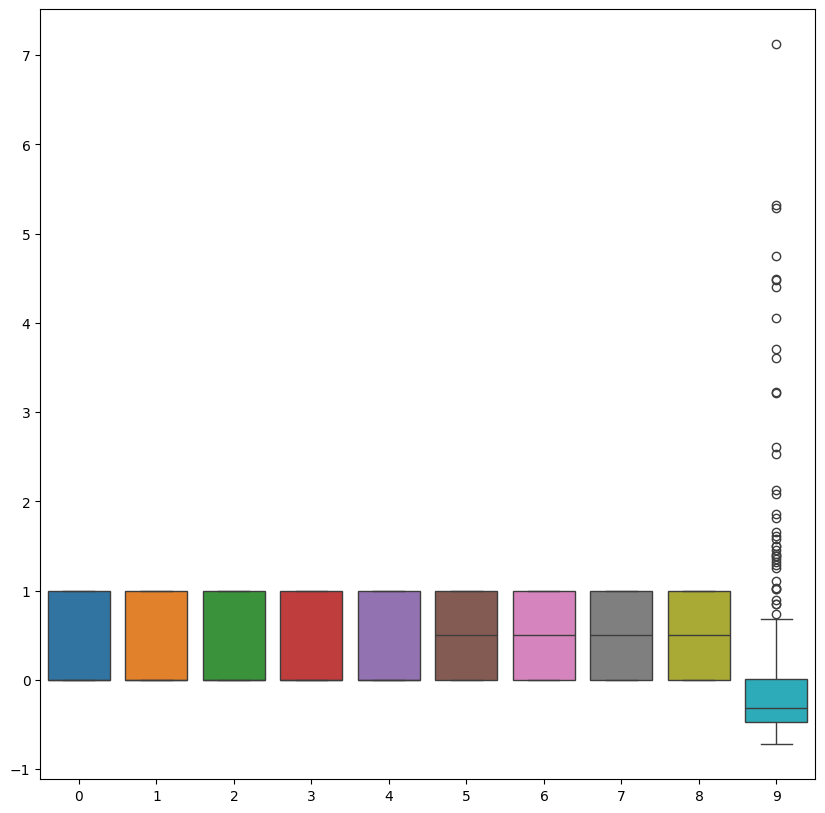

In [19]:
#To better visualize the other plots. We use seaborn boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.boxplot(data = X1_train_trans)


***We could see that the value that goes up to 7 is not the only outlier. We have values that goes above 1 and below 0***

In [20]:
#Print the predicted values
print(y_pred)

[415.26456762 381.75909166 386.52039614 443.65604988 386.69674075
 396.15904533 396.15904533 390.39997757 404.86023561 388.98922068
 385.46232848 396.15904533 385.28598387 384.40426082 396.15904533
 381.58274705 396.15904533 382.81715932 390.22363296 393.22149133
 430.95923794 498.32287907 382.99350393 393.39783594 389.51825452
 386.34405153 404.683891   390.57632218 399.21720808 386.16770692
 385.46232848 405.03658022 387.40211919 390.39997757 396.15904533
 381.40640244 384.0515716  385.63867309 399.92258652 383.87522699
 396.15904533 396.15904533 422.14200742 392.33976828 385.28598387
 382.99350393 381.93543627 385.99136231 396.15904533 399.39355269
 384.40426082 395.33762666 383.34619315 396.15904533 380.17199017
 382.81715932 383.52253777 397.10107276 392.51611289 389.87094374
 389.51825452 379.64295634 383.34619315 505.7293527  395.16128205
 389.34190991 410.32691853 488.44758089 379.64295634 379.81930095
 396.15904533 379.64295634 386.16770692 381.75909166 427.60869034
 395.69031

***To see if these outliers affected our model, we could measure the accuracy of the model by using RMSE***

In [21]:
#Checking the Accuracy of the Model

#Check the Range
range = y1.max() - y1.min()

#Check the RMSE
rmse = root_mean_squared_error(y1_test, y_pred)

#Check the comparison of RMSE and the range of the Target Variable
print(f"The Root mean squared error: {rmse:2f} VS The Range {range}")

The Root mean squared error: 48.092852 VS The Range 383.0


In [22]:
#Now lets find the relative RMSE percentage

relative_rmse_percentage = ((rmse/range)*100)

print(f"The relative RMSE percentage is: {relative_rmse_percentage:.2f}%")


The relative RMSE percentage is: 12.56%


# Conclusions

***As seen from the percentage, the model goes beyond our target threshold of 10% which means the model is not accurate. The RMSE value is approximately about 48 which is high relative to the range of 383 which means that 12% of the models predictions are not accurate as based on the original Critical Reading Mean Score***